In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
data.shape


(5171, 4)

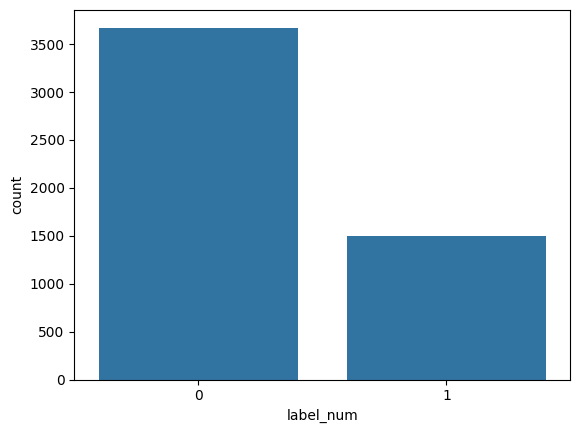

In [ ]:
sns.countplot(x='label_num', data=data)
plt.show()

In [ ]:
data = pd.DataFrame

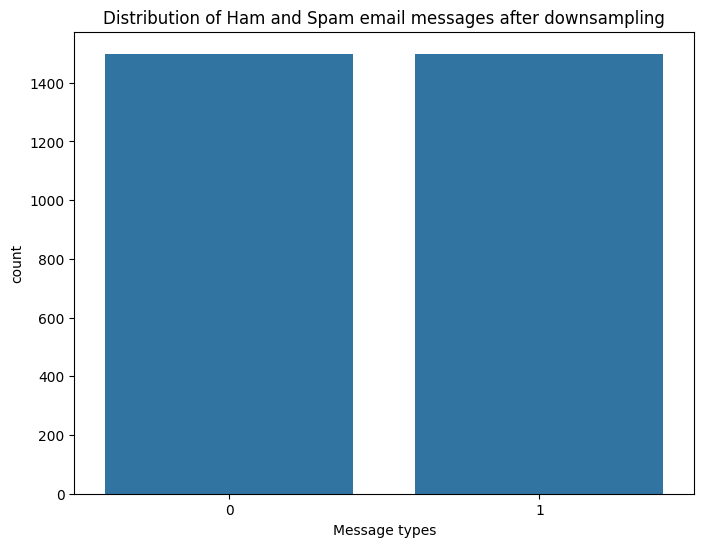

In [ ]:
if 'label_num' not in data.columns:
    raise ValueError("Data must contain the column 'label_num'")
try:
    ham_msg = data[data.label_num == 0]
    spam_msg = data[data.label_num == 1]
except AttributeError as e:
    print(f"AttributeError: {e}")
    raise
try:
    ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)
except ValueError as e:
    print(f"ValueError: {e}")
    raise
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='label_num')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')
plt.show()


In [ ]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


In [ ]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []

    for word in str(text).split():
        word = word.lower()
        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)
    return output

if 'label_num' not in data.columns:
    raise ValueError("Data must contain the column 'label_num'")

ham_msg = data[data.label_num == 0]
spam_msg = data[data.label_num == 1]

ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))

balanced_data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,label,text,label_num
0,3444,ham,subject: conoco - big cowboy darren : ' sure h...,0
1,2982,ham,subject: feb 01 prod : sale teco gas processin...,0
2,2711,ham,subject: california energy crisis california ...,0
3,3116,ham,subject: : nom / actual volume april 23 rd agr...,0
4,1314,ham,subject: eastrans nomination changes effective...,0


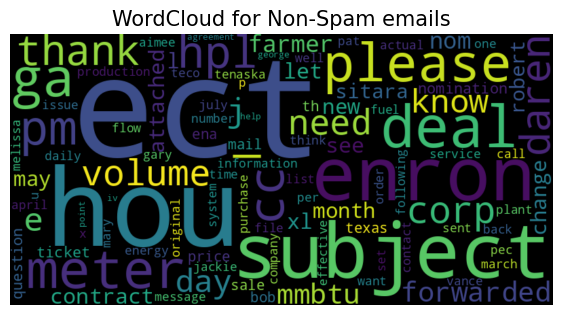

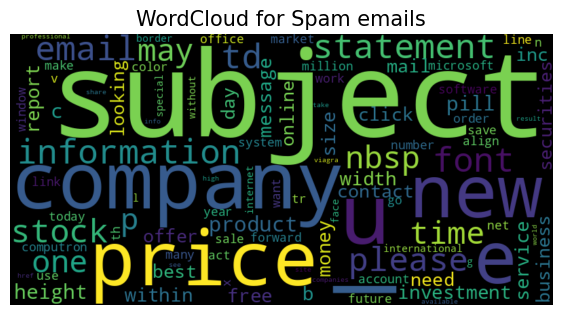

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(
        background_color='black',
        max_words=100,
        width=800,
        height=400,
        collocations=False
    ).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
plot_word_cloud(balanced_data[balanced_data['label_num'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label_num'] == 1], typ='Spam')


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['text'],
    balanced_data['label_num'],
    test_size=0.2,
    random_state=42
)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape


((2398,), (600,), (2398,), (600,))

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences,
                            maxlen=max_len,
                            padding='post',
                            truncating='post')

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32,
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           1274368   
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1278081 (4.88 MB)
Trainable params: 1278081 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
            metrics = ['accuracy'],
            optimizer = 'adam')

In [ ]:
es = EarlyStopping(patience=3,
                monitor = 'val_accuracy',
                restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                    monitor = 'val_loss',
                    factor = 0.5,
                    verbose = 0)

In [ ]:
history = model.fit(train_sequences, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20,
                    batch_size=32,
                    callbacks = [lr, es]
                )

Epoch 1/20
75/75 [==============================] - 9s 89ms/step - loss: 0.6865 - accuracy: 0.5771 - val_loss: 0.6479 - val_accuracy: 0.6717 - lr: 0.0010
Epoch 2/20
75/75 [==============================] - 4s 55ms/step - loss: 0.3003 - accuracy: 0.9078 - val_loss: 0.1701 - val_accuracy: 0.9617 - lr: 0.0010
Epoch 3/20
75/75 [==============================] - 4s 53ms/step - loss: 0.1023 - accuracy: 0.9783 - val_loss: 0.1442 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 4/20
75/75 [==============================] - 6s 86ms/step - loss: 0.3260 - accuracy: 0.8845 - val_loss: 0.4306 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 5/20
75/75 [==============================] - 4s 55ms/step - loss: 0.1903 - accuracy: 0.9525 - val_loss: 0.1074 - val_accuracy: 0.9733 - lr: 0.0010
Epoch 6/20
75/75 [==============================] - 4s 55ms/step - loss: 0.0726 - accuracy: 0.9854 - val_loss: 0.0799 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 7/20
75/75 [==============================] - 6s 75ms/step - loss: 0.0

In [ ]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 [==============================] - 0s 15ms/step - loss: 0.0799 - accuracy: 0.9800
Test Loss : 0.07988537847995758
Test Accuracy : 0.9800000190734863


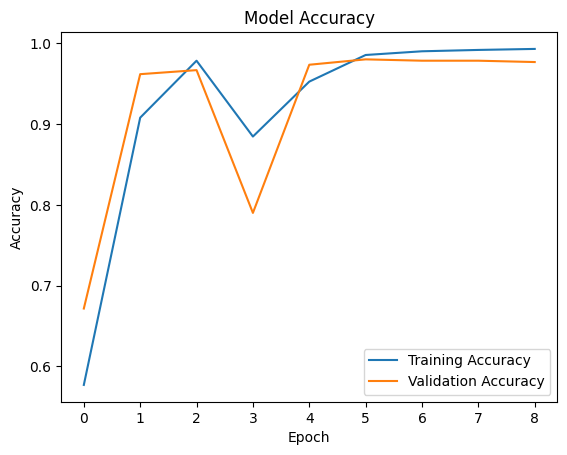

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()